# Tutorial Note on Complementary Slackness in SVM using a 2D Data Example

## Introduction to Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful machine learning algorithm used for both classification and regression tasks. However, it is more commonly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiates the two classes very well.

## The Concept of Complementary Slackness

Complementary slackness is a condition that arises from the Karush-Kuhn-Tucker (KKT) conditions, which are necessary for a solution in certain optimization problems to be optimal, such as in SVMs.

The idea behind complementary slackness can be explained as follows:

- For each constraint in the optimization problem, either the constraint is active (meaning it holds as an equality), or the corresponding Lagrange multiplier (denoted by alpha in SVM) is zero.


## Illustration Using 2D Data Example

Let's consider a simple dataset of 40 samples with two features (hence 2D data), and these samples belong to one of two classes.

We use an SVM with a linear kernel to find the optimal hyperplane that separates the two classes. After training the SVM, we obtain a set of support vectors, which are the data points that lie closest to the decision boundary.

Here is the step-by-step illustration:

1. Fitting the SVM Model:
    We create our dataset, fit the SVM model, and obtain the support vectors.

2. Visualizing the Model:
    We plot the decision boundary and the margins. The support vectors are the points that lie on the margins.

3. Analyzing Support Vectors:
    We print out the alpha values associated with each support vector. These values are Lagrange multipliers obtained during the optimization process.

4. Checking Complementary Slackness:
    For each support vector, we check the product of its alpha value and the slackness condition (`g(x) = y*(w.x + b) - 1`). If our SVM solution is optimal, this product should be very close to zero.

5. **Interpreting Results**:
    By examining the output, we can see whether the complementary slackness condition holds. If it does not hold, then there might be an issue with the optimization process, or the SVM parameters might need tuning.

6. **Understanding Implications**:
    The condition indicates which vectors lie on the margin (non-zero alphas) and which do not influence the decision boundary (zero alphas).

## Conclusion

Through this 2D data example, we understand that complementary slackness is fundamental to the functioning of SVM. It helps in identifying support vectors that are crucial in defining the decision boundary. By thoroughly examining the alphas and the support vectors, one can gain deeper insight into the SVM model's decisions and assure that the optimization has been performed correctly.

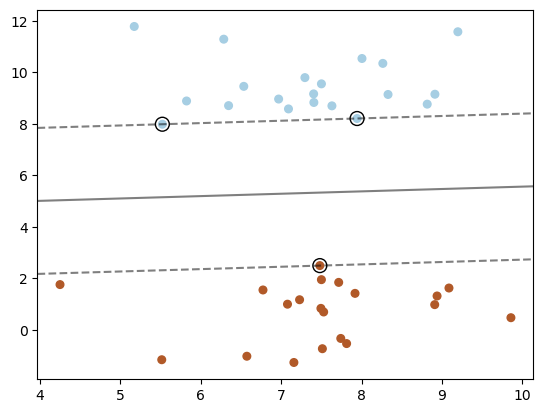

Alpha values and support vectors:
Alpha: -0.02539789856691062, Support Vector: [5.52161775 7.98446372]
Alpha: -0.03732978905504144, Support Vector: [7.94310647 8.20622208]
Alpha: 0.06272768762195205, Support Vector: [7.48006237 2.49392925]

Checking complementary slackness:
Sum of alpha * y for all support vectors: -1.3877787807814457e-17
value of g(x) [0.00012603]
Support vector 1: [5.52161775 7.98446372], alpha * g(x) = [-3.20096731e-06], Slackness Condition: [ True]
value of g(x) [-0.00025225]
Support vector 2: [7.94310647 8.20622208], alpha * g(x) = [9.41642437e-06], Slackness Condition: [ True]
value of g(x) [-0.00012602]
Support vector 3: [7.48006237 2.49392925], alpha * g(x) = [-7.9048573e-06], Slackness Condition: [ True]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Create a simple dataset
X, y = make_blobs(n_samples=40, centers=2, random_state=8)

# Fit the SVM model
model = svm.SVC(kernel='linear', C=100)
model.fit(X, y)

# Visualize the model
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Print the alpha values (Lagrange multipliers) and the support vectors
print("Alpha values and support vectors:")
for alpha, support_vector in zip(model.dual_coef_.flatten(), model.support_vectors_):
    print(f"Alpha: {alpha}, Support Vector: {support_vector}")

# Check the complementary slackness condition for all points
print("\nChecking complementary slackness:")
tolerance = 1e-3  # Tolerance level for np.isclose()
alpha_y_sum = np.sum(model.dual_coef_)
print(f"Sum of alpha * y for all support vectors: {alpha_y_sum}")
# Transform labels from 0 to -1 where necessary
y_transformed = np.where(y == 0, -1, y)

for i, alpha in enumerate(model.dual_coef_.flatten()):
    support_vector = model.support_vectors_[i]
    # Get the corresponding label of the support vector
    sv_label = y_transformed[model.support_][i]
    # Calculate g(x) for the support vector
    g_x = sv_label * (np.dot(model.coef_.flatten(), support_vector) + model.intercept_) - 1    
    print("value of g(x)", g_x)
    # Check if alpha * g(x) is close to 0
    slackness_condition = np.isclose(alpha * g_x, 0, atol=tolerance)
    print(f"Support vector {i+1}: {support_vector}, alpha * g(x) = {alpha * g_x}, Slackness Condition: {slackness_condition}")


## Q2. Explore the solution space for half-circles and moons dataset.
Find best kernel function
Visualize and explain solution

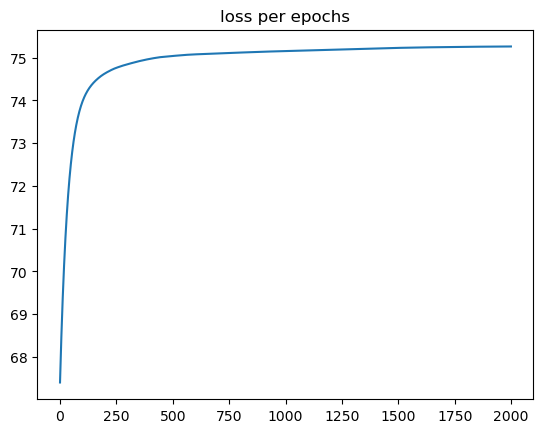

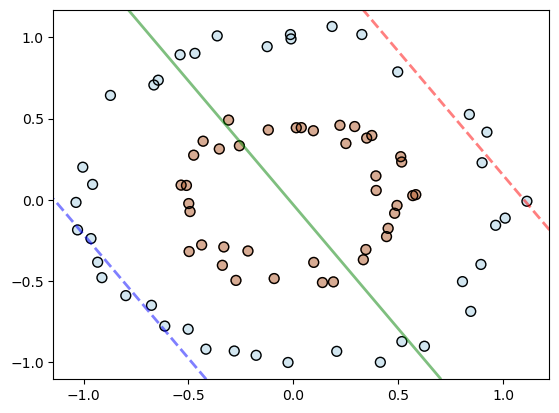

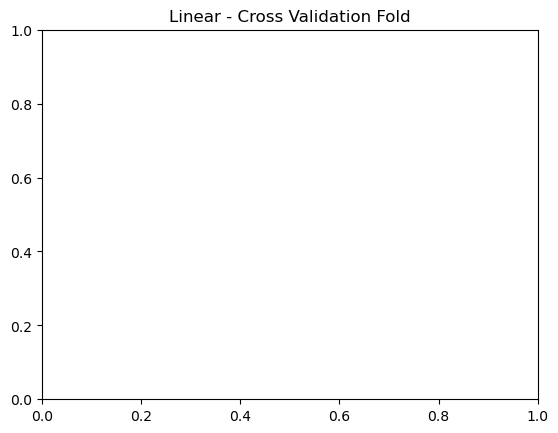

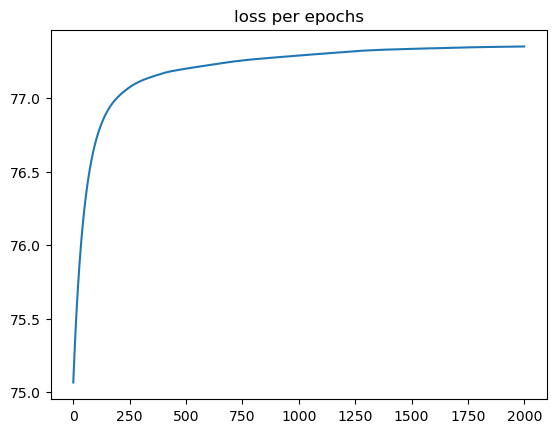

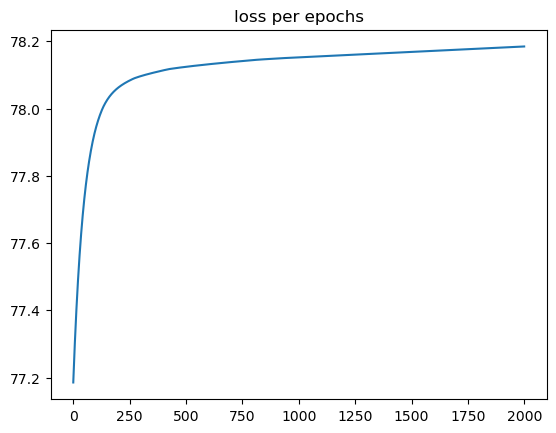

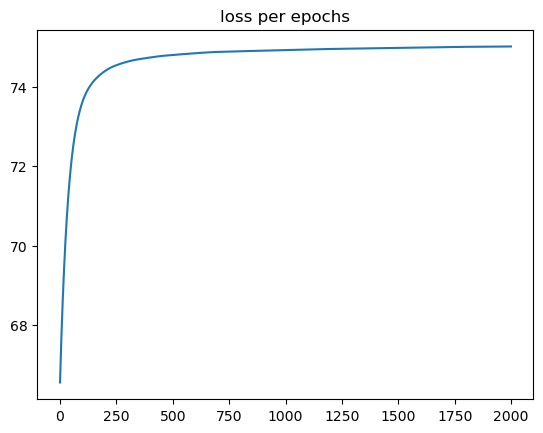

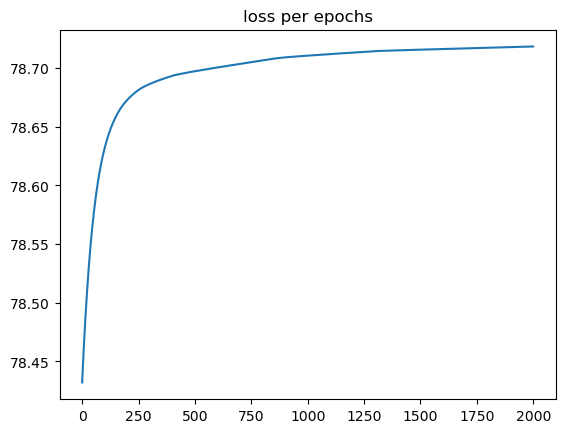

Dataset: Donut, Kernel: Linear, Mean CV Score: 0.37, Scores: [0.35, 0.35, 0.35, 0.3, 0.5]


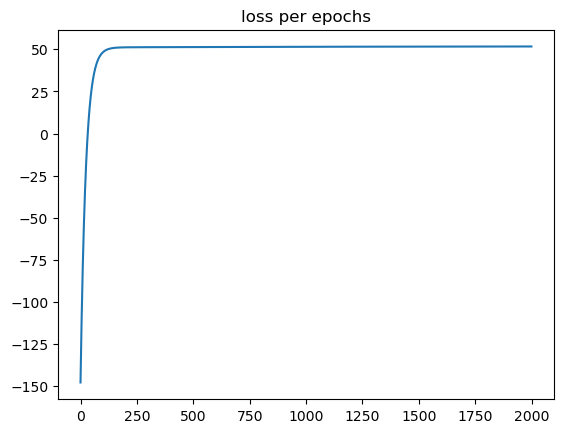

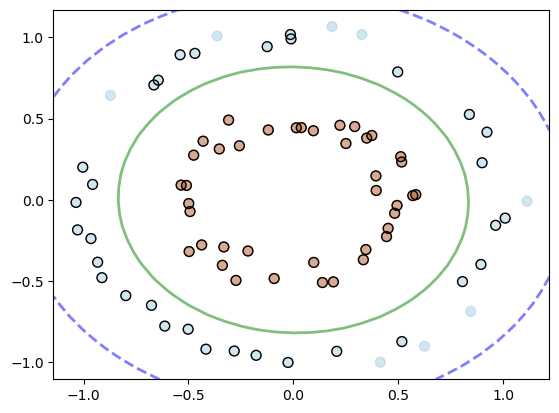

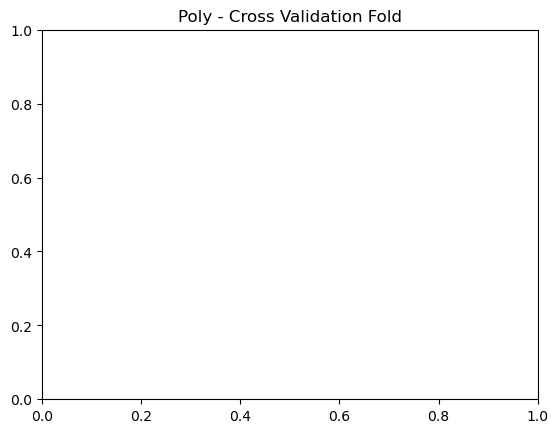

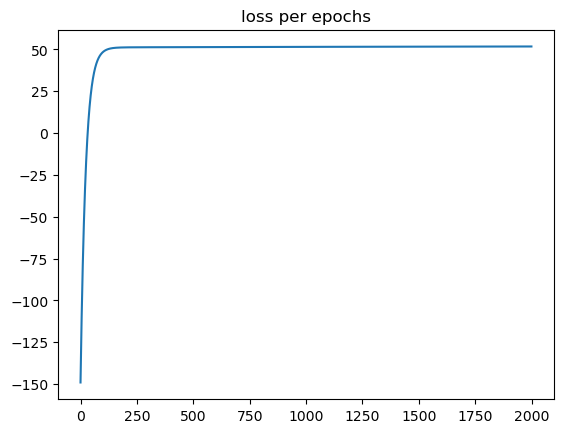

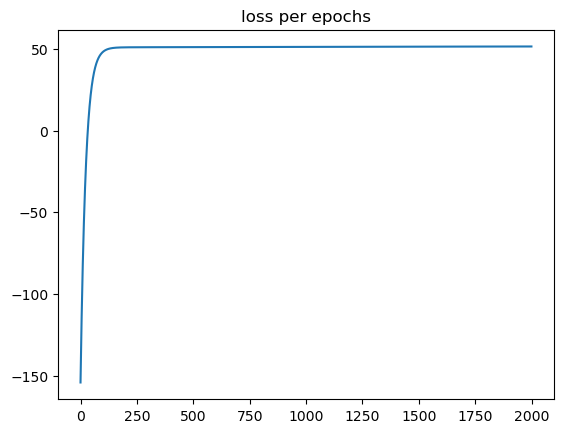

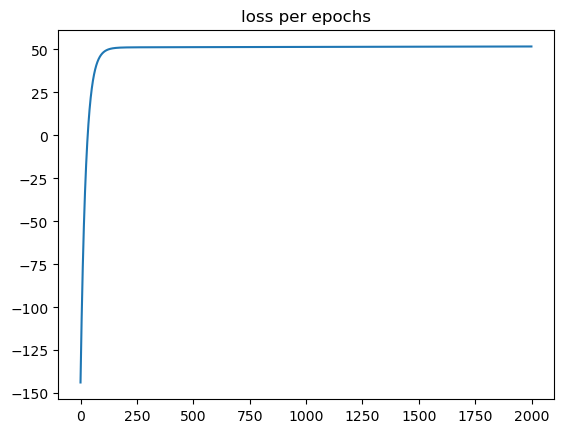

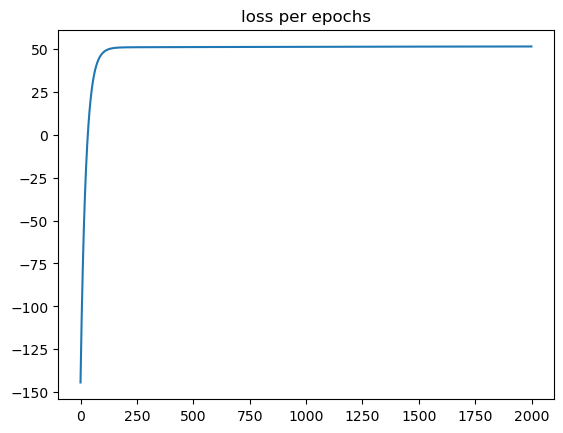

Dataset: Donut, Kernel: Poly, Mean CV Score: 1.00, Scores: [1.0, 1.0, 1.0, 1.0, 1.0]


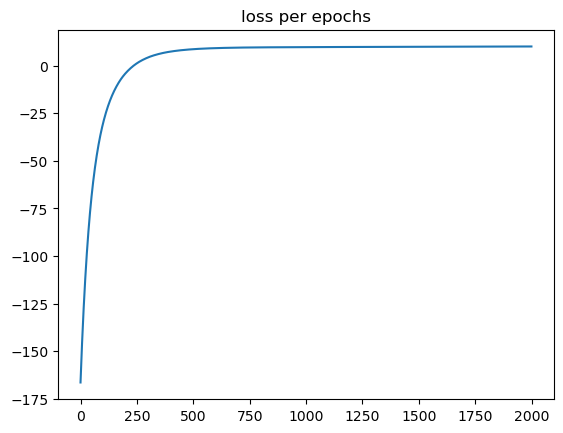

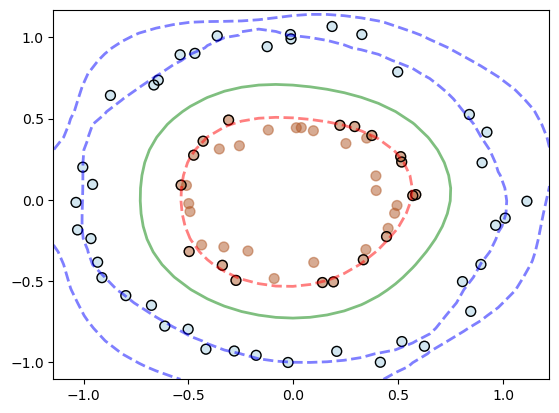

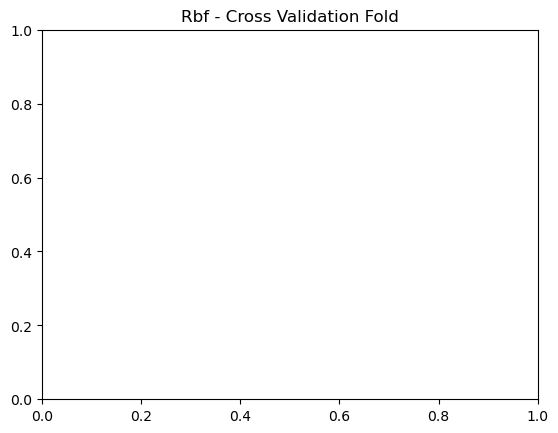

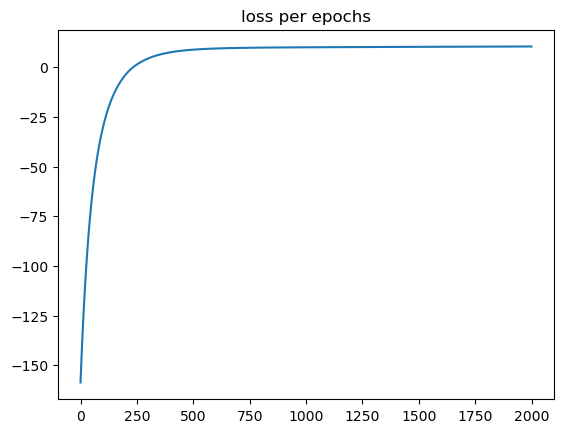

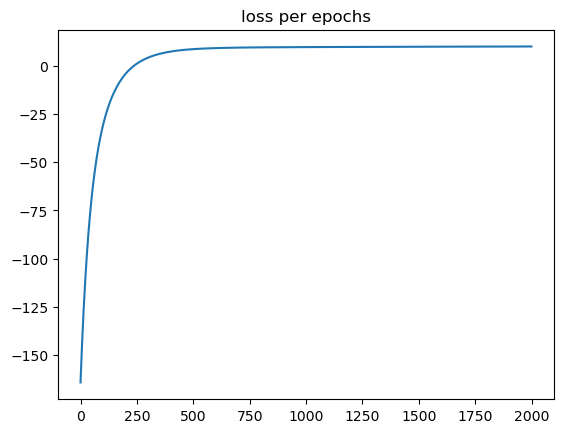

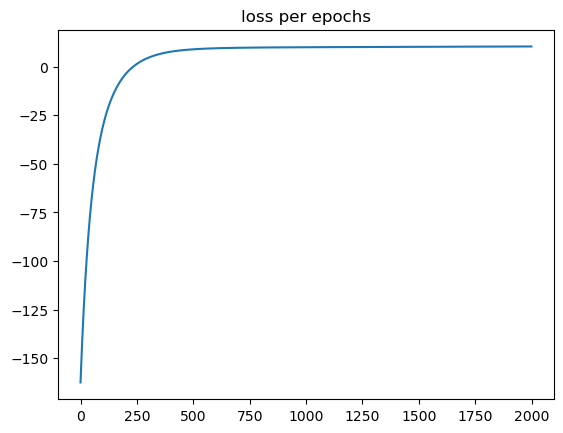

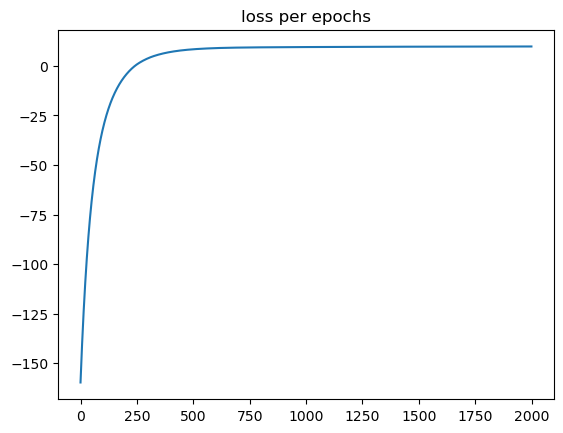

Dataset: Donut, Kernel: Rbf, Mean CV Score: 1.00, Scores: [1.0, 1.0, 1.0, 1.0, 1.0]


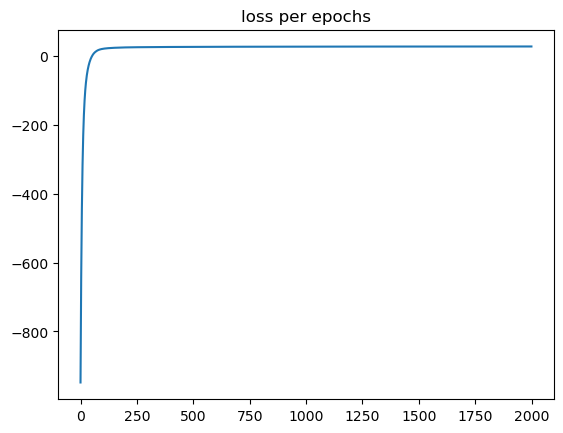

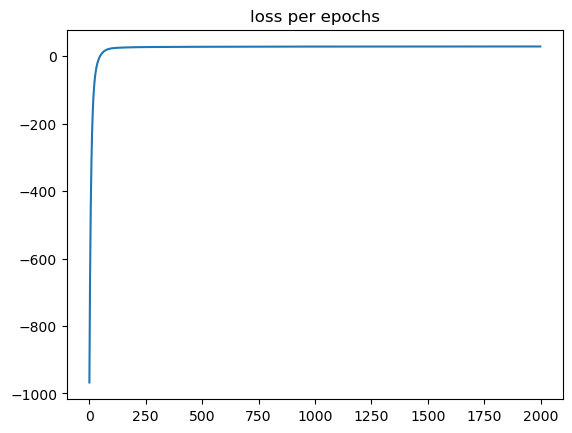

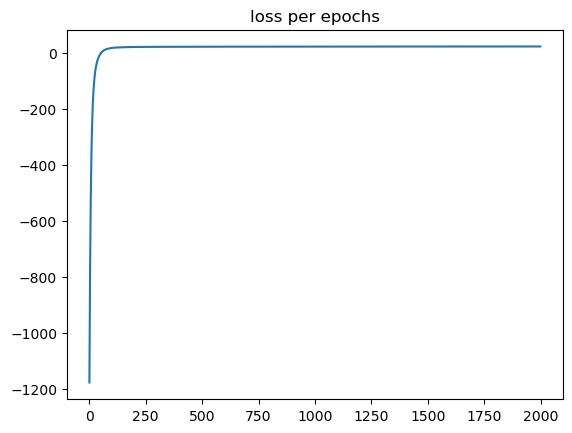

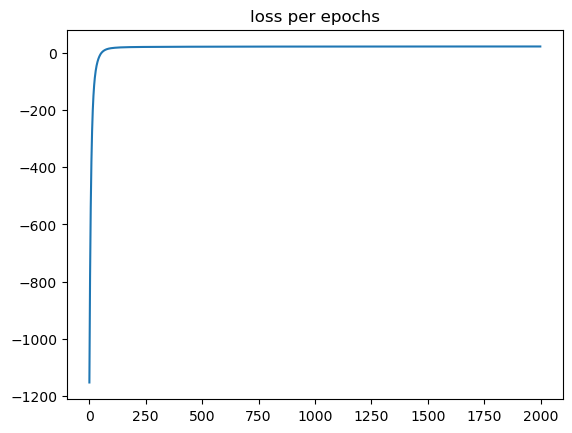

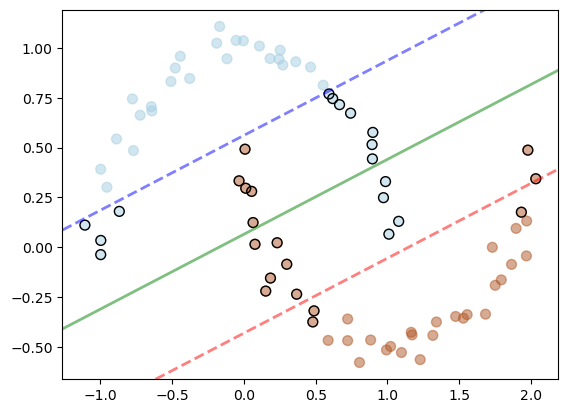

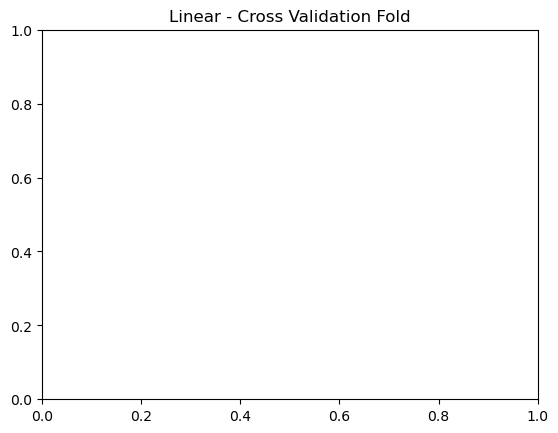

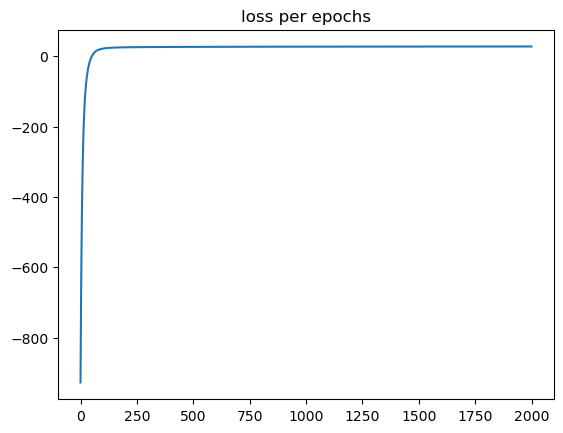

Dataset: Moon, Kernel: Linear, Mean CV Score: 0.85, Scores: [0.95, 0.9, 0.75, 0.75, 0.9]


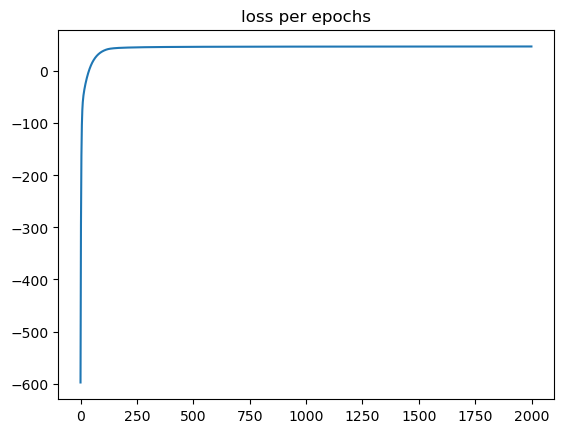

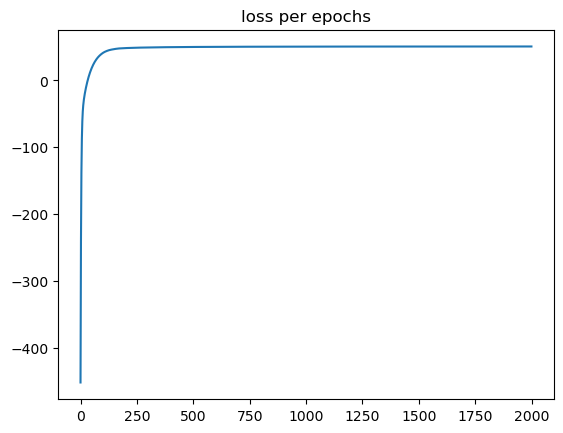

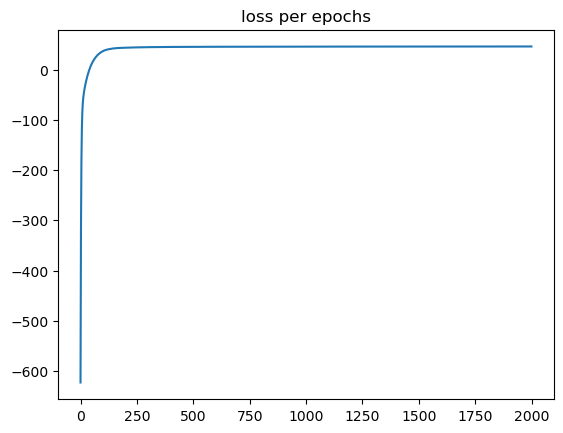

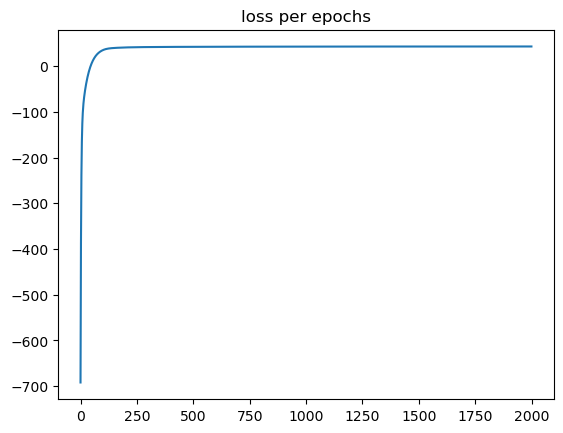

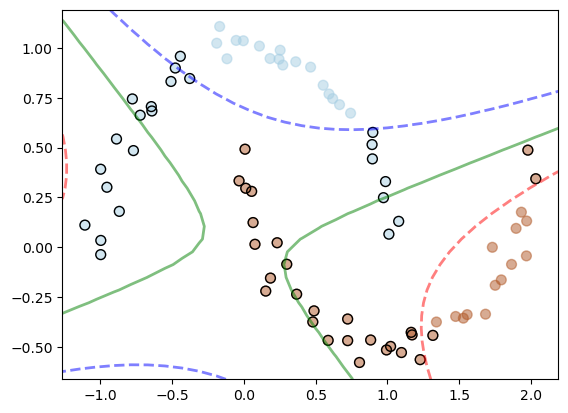

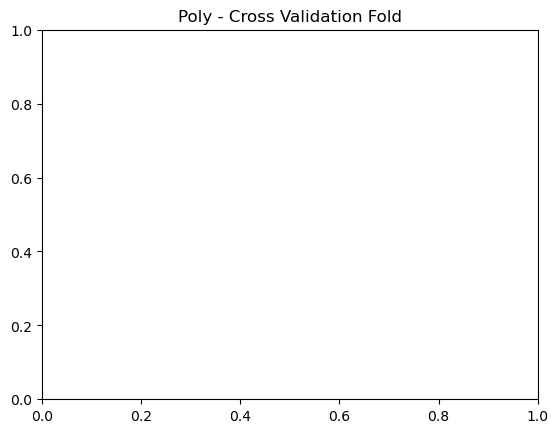

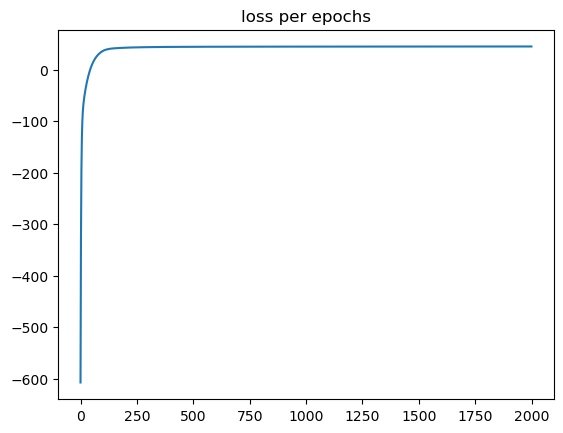

Dataset: Moon, Kernel: Poly, Mean CV Score: 0.71, Scores: [0.75, 0.85, 0.65, 0.55, 0.75]


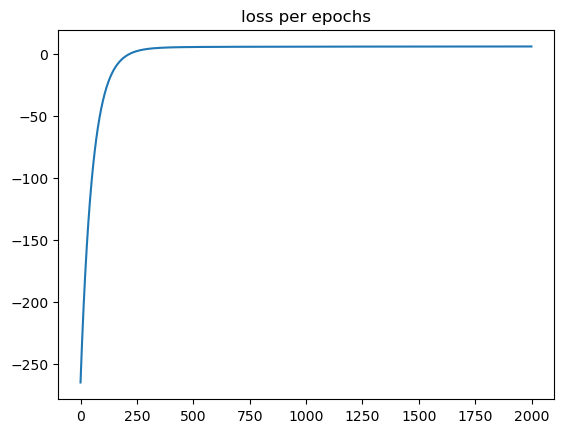

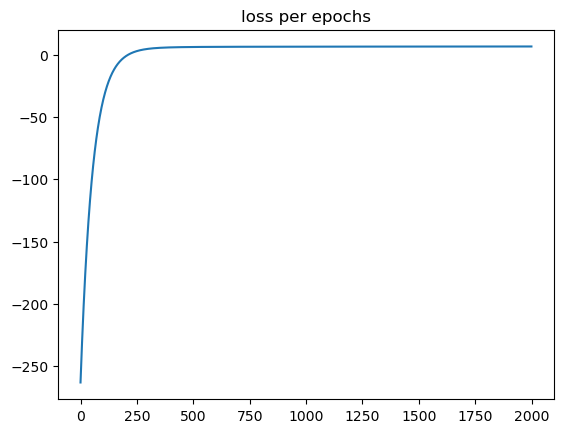

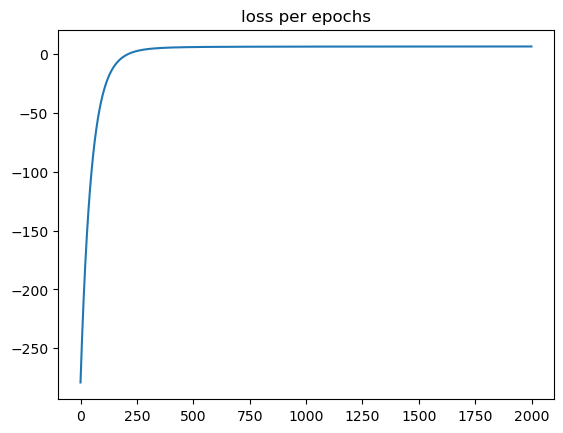

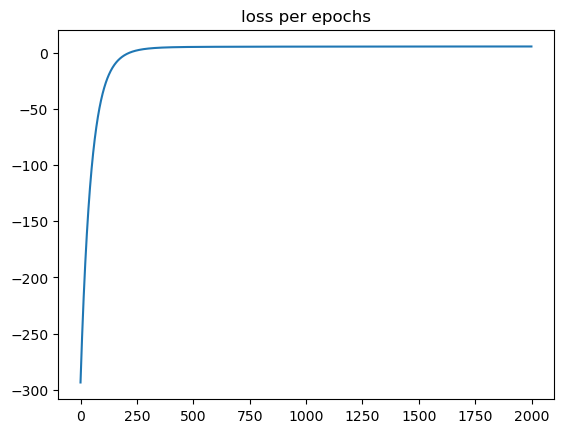

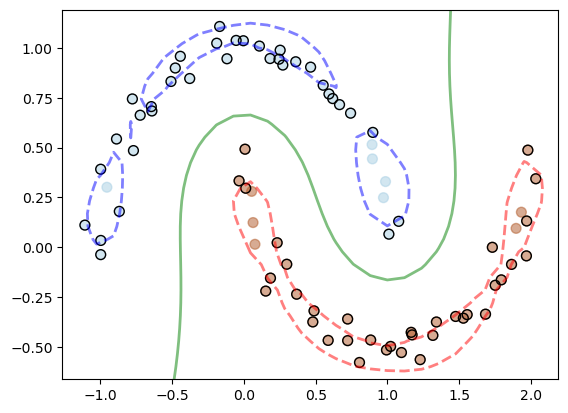

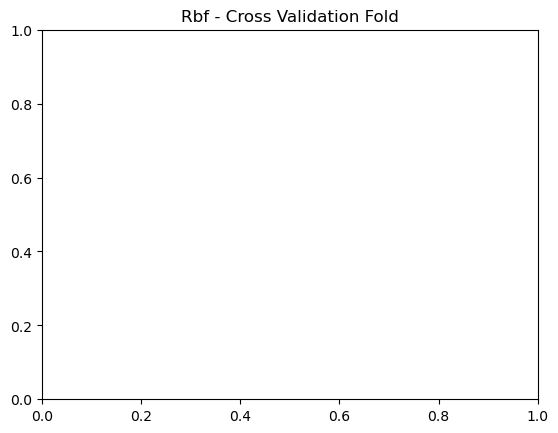

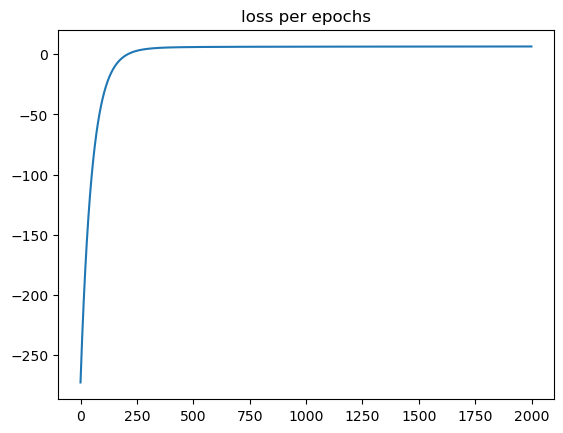

Dataset: Moon, Kernel: Rbf, Mean CV Score: 1.00, Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Best kernel for donut dataset: poly with mean CV score of 1.00
Best kernel for moon dataset: rbf with mean CV score of 1.00


In [30]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

class SVM:
    def __init__(self, C=1.0, kernel='rbf', sigma=0.1, degree=2):
        self.C = C
        if kernel == 'poly':
            self.kernel = self._polynomial_kernel
            self.C = 1
            self.degree = degree
        elif kernel == 'rbf':
            self.kernel = self._rbf_kernel
            self.sigma = sigma
        else:
            self.kernel = self._linear_kernel

        self.X = None # inputs
        self.y = None # target
        self.alpha = None # lagrangian multiplier
        self.b = 0 # bias
        self.ones = None

    def _rbf_kernel(self, X_t, X):
        return np.exp(-(1 / self.sigma ** 2) * np.linalg.norm(X_t[:, np.newaxis] - X[np.newaxis, :], axis=2) ** 2)

    def _polynomial_kernel(self, X_t, X):
        return (X_t.dot(X.T)) ** self.degree

    def _linear_kernel(self, X, X_t):
        return (X.dot(X_t.T))

    def fit(self, X, y, lr=1e-3, epochs=200):

        self.X = X
        self.y = y

        # (N,)
        self.alpha = np.ones(X.shape[0])
        # self.alpha = np.random.random(X.shape[0]) # lagrangian multiplier lambdas (can't use lambda as variable name)
        self.b = 0 # bias
        # (N,)
        self.ones = np.ones(X.shape[0])

        # (N,N) =             (N,N) *        (N,N)
        y_outer = np.outer(y, y)
        y_iy_jk_ij = y_outer * self.kernel(X, X)

        gains = []
        for _ in range(epochs):
            # (500,)  =    (500,)      (N,N).(N,)=(N,)
            gradient = self.ones - y_iy_jk_ij.dot(self.alpha)

            self.alpha = self.alpha + lr * gradient

            self.alpha[self.alpha > self.C] = self.C
            self.alpha[self.alpha < 0] = 0

            # the lagrangian formulation of the solution
            gain = np.sum(self.alpha) - 0.5 * np.sum(np.outer(self.alpha, self.alpha) * y_iy_jk_ij)

            gains.append(gain)
            # self.plot_decision_boundary()

        index = np.where(self.alpha > 0 & (self.alpha < self.C))[0]
        # (m,)= (m,)       (n,).(n,m)= (m,)
        b_i = y[index] - (self.alpha * y).dot(self.kernel(X, X[index]))
        self.b = np.mean(b_i)

        plt.plot(gains)
        plt.title("loss per epochs")
        plt.show()

    def _decision_function(self, X):
        return (self.alpha * self.y).dot(self.kernel(self.X, X)) + self.b

    def predict(self, X):
        return np.sign(self._decision_function(X))

    def score(self, X, y):
        y_hat = self.predict(X)
        return np.mean(y == y_hat)

    def plot_decision_boundary(self):
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=50, cmap=plt.cm.Paired, alpha=.5)
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self._decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors=['b', 'g', 'r'], levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'], linewidths=[2.0, 2.0, 2.0])

        # highlight the support vectors
        ax.scatter(self.X[:, 0][self.alpha > 0.], self.X[:, 1][self.alpha > 0.], s=50,
                   linewidth=1, facecolors='none', edgecolors='k')

        plt.show()


class SampleData:
    def get_binary(self, n_samples, noise=0.05, random_state=3):
        n = n_samples
        blobs = datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=2, random_state=random_state)
        return blobs[0], blobs[1]

    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]

    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
        return noisy_circles[0], noisy_circles[1]

    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()


def k_fold_cross_validation(X, y, k, svm_params):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        svm = SVM(**svm_params)
        svm.fit(X_train_fold, y_train_fold, lr=1e-3, epochs=2000)

       
        # Visualize decision boundary on the last fold
        if test_index[-1] == y.size - 1:  # Checking if it's the last fold
            svm.plot_decision_boundary()
            plt.title(f"{svm_params.get('kernel', 'Kernel').capitalize()} - Cross Validation Fold")
            plt.show()


        # Calculate accuracy
        score = svm.score(X_test_fold, y_test_fold)
        scores.append(score)
    
    return np.mean(scores), scores

# Main execution
if __name__ == '__main__':
    sample = SampleData()

    datasets = {
        'donut': sample.get_donut(n_samples=100, noise=0.05),
        'moon': sample.get_moon(n_samples=100, noise=0.05)
    }


    kernels = {
        'linear': {'C': 1.0, 'kernel': 'linear'},
        'poly': {'C': 1.0, 'kernel': 'poly', 'degree': 2},
        'rbf': {'C': 1.0, 'kernel': 'rbf', 'sigma': 0.5}
    }

    k = 5  # Number of folds for cross-validation
    mean_scores = {}

    for dataset_name, (X, y) in datasets.items():
        # Convert labels from 0 to -1 for the SVM implementation
        y[y == 0] = -1

        for kernel_name, params in kernels.items():
            mean_score, all_scores = k_fold_cross_validation(X, y, k, params)
            mean_scores[(kernel_name, dataset_name)] = mean_score
            print(f"Dataset: {dataset_name.capitalize()}, Kernel: {kernel_name.capitalize()}, Mean CV Score: {mean_score:.2f}, Scores: {all_scores}")

    # Determine the best kernel based on the mean cross-validation scores
#     best_kernel, best_dataset = max(mean_scores, key=mean_scores.get)
#     print(f"The best kernel is '{best_kernel}' for the '{best_dataset}' dataset with a cross-validation score of {mean_scores[(best_kernel, best_dataset)]:.2f}.")
for dataset_name in datasets:
        best_kernel = max((kernel for kernel, data in mean_scores if data == dataset_name), key=lambda k: mean_scores[(k, dataset_name)])
        print(f"Best kernel for {dataset_name} dataset: {best_kernel} with mean CV score of {mean_scores[(best_kernel, dataset_name)]:.2f}")

For the 'donut' dataset:
    - The linear kernel produced a mean cross-validation (CV) score of 0.37, indicating that it was not effective 
      in separating the two classes in the 'donut' dataset, which is expected due to the non-linear nature of the 
      data.
    - The polynomial kernel achieved a perfect mean CV score of 1.00, which implies that it was able to perfectly 
      separate the classes for each fold in cross-validation. The polynomial kernel can handle the circular   
      symmetry of the 'donut' dataset effectively by mapping the features into a higher-dimensional space where the       classes are linearly separable.
    - The RBF kernel also scored a perfect mean CV score of 1.00, reflecting its capability to capture the radial 
       distribution of the data points. The RBF kernel excels in scenarios where the separation boundary is not 
       linear, and its performance on the 'donut' dataset confirms its suitability for such data.

For the 'moon' dataset:
    - The linear kernel performed better than expected with a mean CV score of 0.85.The better-than-expected 
      performance could be due to the dataset's specific characteristics, noise, or the way the data was split 
      during cross-validation. However, typically we would expect a linear kernel to underperform on such data.
    - The polynomial kernel resulted in a mean CV score of 0.71, which is lower than the linear kernel in this 
      case. This could be due to several factors, such as suboptimal parameter settings for the degree of the 
      polynomial, or the specific splits of data in cross-validation not favoring the polynomial kernel.
    - The RBF kernel achieved a mean CV score of 1.00, indicating a perfect classification on this dataset as well.       The RBF kernel is adept at handling the curved shapes of the 'moon' dataset due to its flexible decision 
      boundary that can take on an infinite number of possible shapes.

Overall, the RBF kernel showed excellent performance on both datasets, achieving perfect classification.

### Q3. Train a simplest possible MLP to solve the same classification problems
Explain rational behind your training process and design parameters
Compare SVM and MLP solution in terms of computational cost


In [40]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt




# Sample SimpleMLP class implementation

class SimpleMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_pred, y_true):
        # One-hot encoding if y_true is not already one-hot
        if y_true.ndim == 1:
            y_true = np.eye(y_pred.shape[1])[y_true]
        return -np.mean(np.sum(y_true * np.log(y_pred + 1e-12), axis=1))  # Adding epsilon to prevent log(0)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        y_pred = self.softmax(self.z2)
        return y_pred

    def backward(self, X, y_true, y_pred):
        # One-hot encoding if y_true is not already one-hot
        if y_true.ndim == 1:
            y_true = np.eye(y_pred.shape[1])[y_true]
        
        # Gradients for output layer
        d_z2 = y_pred - y_true
        d_W2 = np.dot(self.a1.T, d_z2)
        d_b2 = np.sum(d_z2, axis=0)

        # Gradients for hidden layer
        d_a1 = np.dot(d_z2, self.W2.T)
        d_z1 = d_a1 * self.relu_derivative(self.z1)
        d_W1 = np.dot(X.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0)

        # Update weights and biases
        lr = 0.001  # Learning rate
        self.W1 -= lr * d_W1
        self.b1 -= lr * d_b1
        self.W2 -= lr * d_W2
        self.b2 -= lr * d_b2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, y_pred)
            if epoch % 100 == 0:
                loss = self.cross_entropy_loss(y_pred, y)
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

    def accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)
    def score(self, X, y):
        return self.accuracy(X, y)

# Integrate the MLP into the existing cross-validation framework ...
class SampleData:
    def get_binary(self, n_samples, noise=0.05, random_state=3):
        n = n_samples
        blobs = datasets.make_blobs(n_samples=n, centers=2, n_features=2, cluster_std=2, random_state=random_state)
        return blobs[0], blobs[1]

    def get_moon(self, n_samples, noise=0.05):
        noisy_moons = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=6)
        return noisy_moons[0], noisy_moons[1]

    def get_donut(self, n_samples, noise=0.05, factor=0.5):
        noisy_circles = datasets.make_circles(n_samples=n_samples, factor=factor, noise=noise)
        return noisy_circles[0], noisy_circles[1]

    def plot(self, X, y):
        ax = plt.gca()
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
        plt.show()

# Sample data generator function
def get_data(dataset_name):
    data_fetchers = {
        'donut': sample.get_donut,
        'moon': sample.get_moon
    }
    return data_fetchers[dataset_name](n_samples=100, noise=0.05)


def k_fold_mlp_on_dataset(dataset_name, k=5):
    X, y = get_data(dataset_name)  # Load dataset
    return k_fold_mlp(X, y, k)

# Main k-fold cross-validation routine
def k_fold_mlp(X, y, k=5):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    train_scores, test_scores = [], []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        mlp = SimpleMLP(input_size=X_train.shape[1], hidden_size=10, output_size=2)
        mlp.train(X_train, y_train, epochs=200)

        train_score = mlp.score(X_train, y_train)
        test_score = mlp.score(X_test, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)


    return np.mean(train_scores), np.std(train_scores), np.mean(test_scores), np.std(test_scores)


# Perform k-fold cross-validation for both datasets and print the scores
for dataset_name in ['donut', 'moon']:
    mean_train_score, std_train_score, mean_test_score, std_test_score = k_fold_mlp_on_dataset(dataset_name, k=5)
    print(f"{dataset_name.capitalize()} Dataset - MLP mean training accuracy: {mean_train_score:.3f} (+/- {std_train_score:.3f})")
    print(f"{dataset_name.capitalize()} Dataset - MLP mean testing accuracy: {mean_test_score:.3f} (+/- {std_test_score:.3f})")


Epoch 0, Loss: 0.9605384505816807
Epoch 100, Loss: 0.5335610761713987
Epoch 0, Loss: 2.6325155961460927
Epoch 100, Loss: 0.5535868319950649
Epoch 0, Loss: 1.5541960550052996
Epoch 100, Loss: 0.5563271400116305
Epoch 0, Loss: 1.1606049355453147
Epoch 100, Loss: 0.37757415631514074
Epoch 0, Loss: 1.0594828748404181
Epoch 100, Loss: 0.3712213806819503
Donut Dataset - MLP mean training accuracy: 0.948 (+/- 0.037)
Donut Dataset - MLP mean testing accuracy: 0.880 (+/- 0.051)
Epoch 0, Loss: 3.013970229799061
Epoch 100, Loss: 0.22495708288524557
Epoch 0, Loss: 1.5270022191953039
Epoch 100, Loss: 0.2868521661296195
Epoch 0, Loss: 0.5763674136043864
Epoch 100, Loss: 0.35379844127202115
Epoch 0, Loss: 2.158742925173027
Epoch 100, Loss: 0.29212593022363054
Epoch 0, Loss: 1.1664127305779406
Epoch 100, Loss: 0.28154048085932654
Moon Dataset - MLP mean training accuracy: 0.885 (+/- 0.024)
Moon Dataset - MLP mean testing accuracy: 0.870 (+/- 0.068)


Training Process:
Initialization: 
	Weights and biases for both the hidden layer (W1, b1) and the output layer (W2, 	 
	b2) are initialized randomly. This breaks the symmetry and allows the MLP to 
	learn diverse features.
Activation Functions:
    ReLU (Rectified Linear Unit) is used as the activation function for the hidden layer, which introduces non-
    linearity into the model, allowing it to learn complex patterns.
    Softmax is applied at the output layer to obtain a probability distribution over the target classes, which is 
    appropriate for multi-class classification problems.
Loss Function:
    Cross-Entropy Loss is used to measure the performance of the classification. It quantifies the difference 
    between the predicted probabilities and the target values.
Backpropagation:
    After computing the output using the forward pass, the backward pass computes gradients of the loss function 
    with respect to the weights and biases by applying the chain rule.
Weight Update:
    The model's weights and biases are updated using the calculated gradients and a predefined learning rate.
Training Epochs:
    The training is performed over a certain number of epochs, iterating the forward and backward passes, gradually
    improving the model parameters based on the computed gradients.
    
    
Design Parameters:
Learning Rate (lr): 
	Set to a relatively small value (0.001) to ensure gradual 
	convergence and avoid overshooting the minimum of the loss function.
Number of Hidden Units (hidden_size): 
	The number of neurons in the hidden layer is set to 10, which is a design choice 
	that balances model complexity and computational cost.
Number of Epochs: 
	The training process is carried out for a predefined number of epochs (200 in 
	this case), which is a hyperparameter that can be tuned based on the validation 
	performance of the model.




MLP:
Computation Cost:
Typically requires more computation due to the iterative nature of backpropagation and the larger number of parameters.
Hyperparameters: 
More hyperparameters to tune (learning rate, number of layers, number of neurons per layer, etc.).

SVM:
Computation Cost: 
Solves a convex optimization problem, which can be less computationally intensive than MLP's iterative approach for smaller datasets or less complex problems.
Hyperparameters: 
Fewer hyperparameters (kernel type, regularization parameter, etc.).

    
    
    
    
